<a href="https://colab.research.google.com/github/prabindebnath25/Airbnb-Bookings-Analysis---Capstone-Project/blob/main/Solution_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# loading and general inspection of the data

In [3]:
# Load the file
df = pd.read_csv('/content/drive/MyDrive/Airbnb Bookings Analysis - Capstone Project/Airbnb NYC 2019.csv')

Firt we check head, tail, info, number of unique values in each columns and shape

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
df.nunique()        # Unique element in each columns


id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [8]:
df.shape  #shape of the dataframe

(48895, 16)

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Data Cleaning

In [10]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

1. replace the nan values in name column by "missing"
2. replace the nan values in host_name column by "missing"
3. Replace the nan values in the reviews_per_month column by 0


In [11]:
# For Nan Values in column name, replace Nan with missing
df['name'].fillna("missing", inplace= True)

In [12]:
# For Nan Values in column host_name, replace Nan with missing
df['host_name'].fillna('missing', inplace= True)


In [13]:
# For Nan Values in column reviews_per_month,replacing Nan with 0
df['reviews_per_month'].fillna(0,inplace = True)

We drop the  last review column

In [14]:
# Drop the last review column
df.drop(['last_review'], axis= 1, inplace=True)

In [15]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Here we have managed all the nan values

since we have the longitude and latitude we plot the data for better understanding

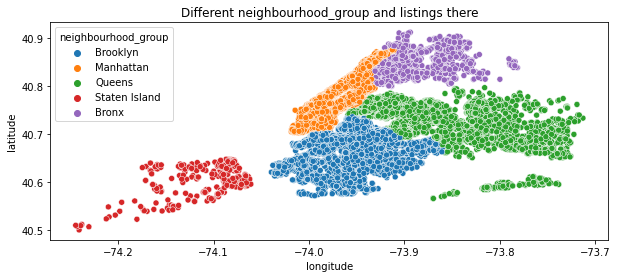

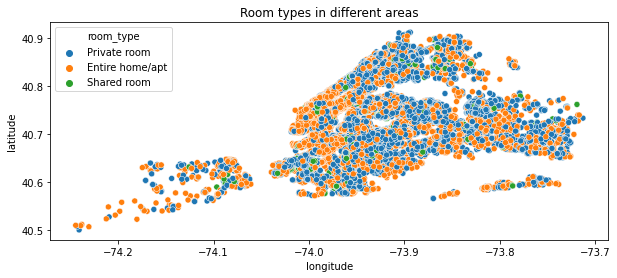

In [34]:
# Wwe plot the longitude and latitude 
sns.scatterplot(x= df.longitude, y=df.latitude ,hue= df.neighbourhood_group)
plt.title('Different neighbourhood_group and listings there')
plt.show()
sns.scatterplot(x= df.longitude, y= df.latitude, hue = df.room_type)
plt.title('Room types in different areas')
plt.plot()
plt.rcParams['figure.figsize'] = 5,5

#What can we learn about different hosts and areas?

In [ ]:
df.neighbourhood_group.value_counts() #there are 5 neighbourhood group

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

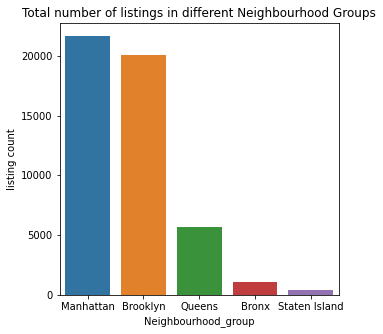

In [ ]:
sns.barplot(x= df.neighbourhood_group.value_counts().index, y= df.neighbourhood_group.value_counts().values)
plt.title('Total number of listings in different Neighbourhood Groups')
plt.xlabel('Neighbourhood_group')
plt.ylabel('listing count')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

from above figure we can see that Manhattan area has most number of listings followed by Brooklyn


## Number of hosts in different neighbourhoods

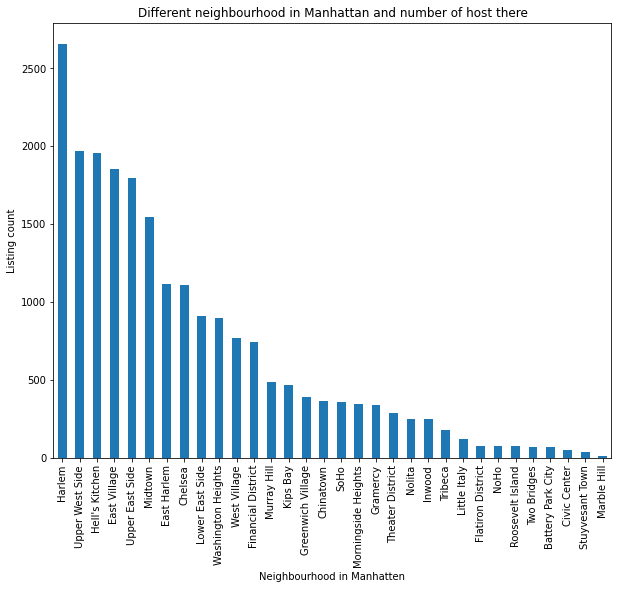

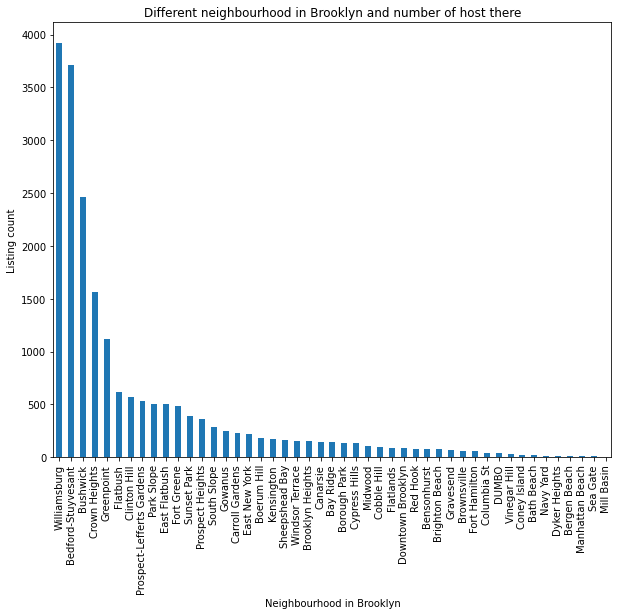

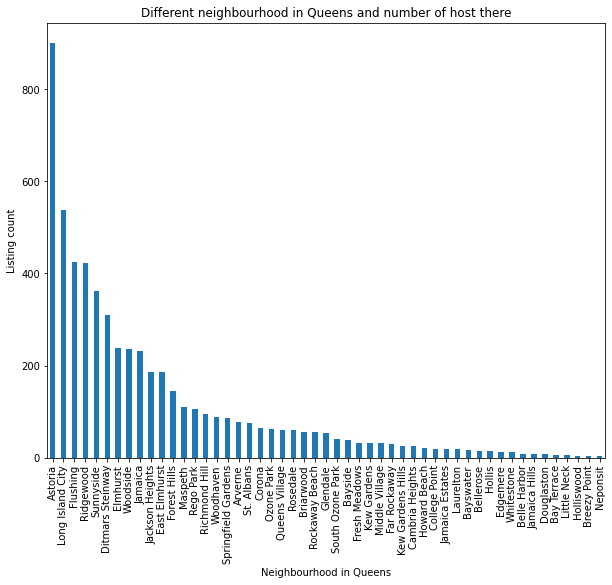

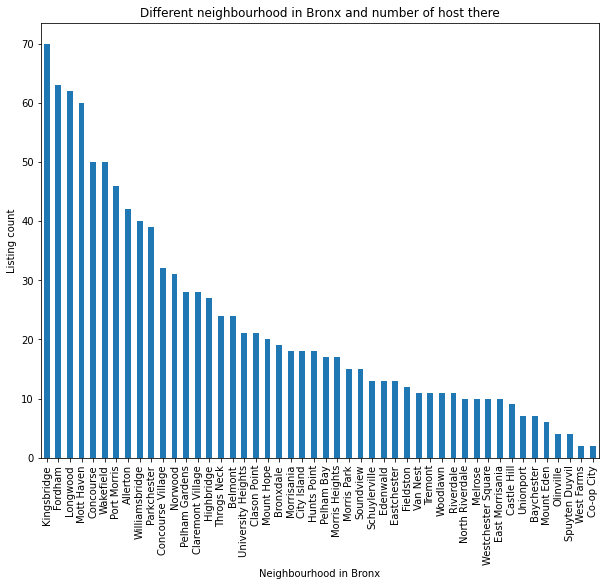

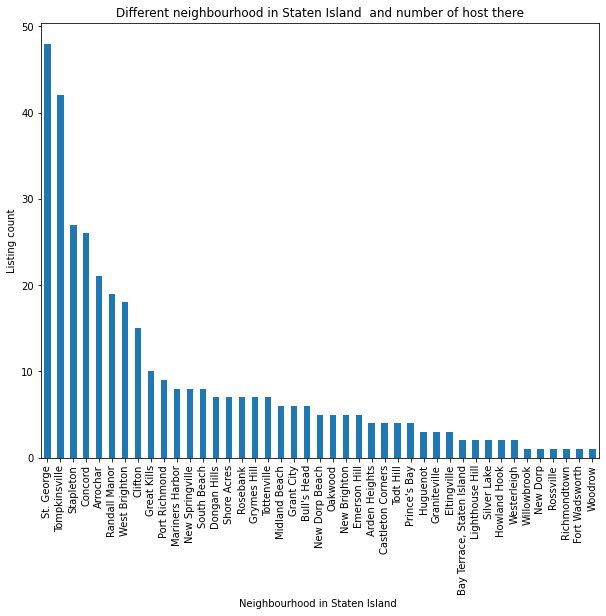

In [18]:
df[df['neighbourhood_group'] == 'Manhattan'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')

plt.title('Different neighbourhood in Manhattan and number of host there')
plt.xlabel('Neighbourhood in Manhatten')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Brooklyn'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Brooklyn and number of host there')
plt.xlabel('Neighbourhood in Brooklyn')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Queens'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Queens and number of host there')
plt.xlabel('Neighbourhood in Queens')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Bronx'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Bronx and number of host there')
plt.xlabel('Neighbourhood in Bronx')
plt.ylabel('Listing count')
plt.show()

df[df['neighbourhood_group'] == 'Staten Island'].groupby(['neighbourhood'])['host_id'].count().sort_values(ascending= False).plot(kind = 'bar')
plt.title('Different neighbourhood in Staten Island  and number of host there')
plt.xlabel('Neighbourhood in Staten Island ')
plt.ylabel('Listing count')
plt.show()

In the aove figures we have shown the different neighbourhood with numver of host there in all 5 neighbourhood_groups

##top 10 hosts in different neighbourhood groups by number of bookings

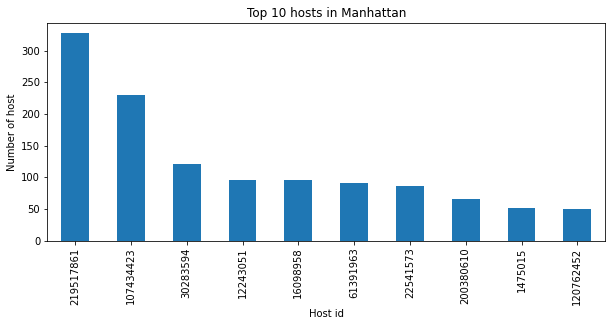

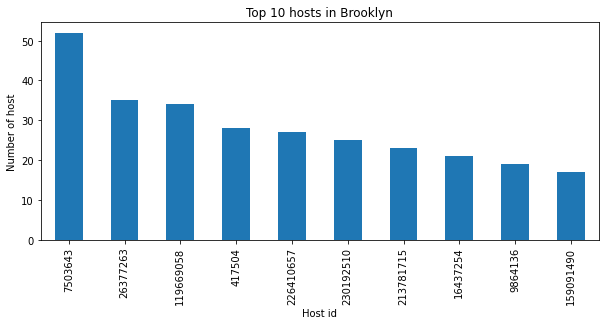

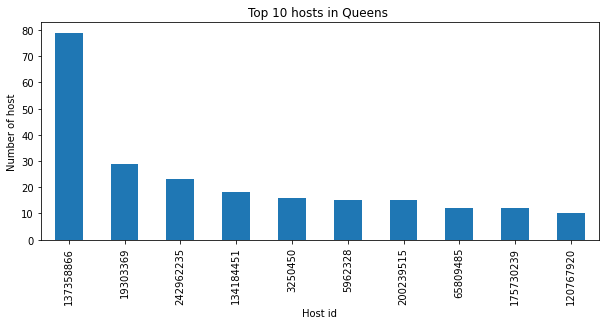

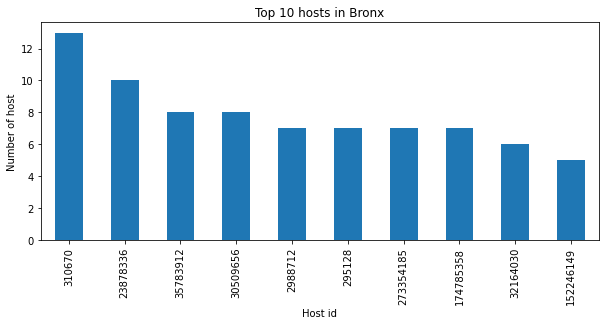

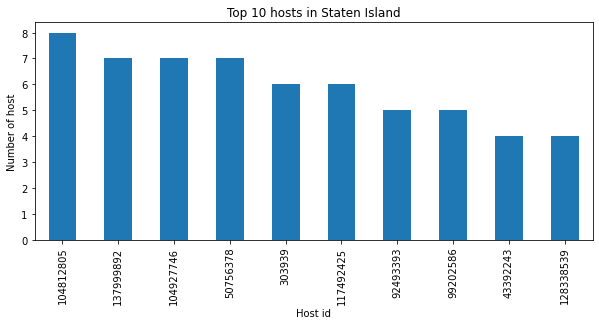

In [19]:
plt.rcParams['figure.figsize'] = [10, 4]
df[df['neighbourhood_group'] == 'Manhattan']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Manhattan')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Brooklyn']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Brooklyn')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Queens']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Queens ')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Bronx']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Bronx')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()

df[df['neighbourhood_group'] == 'Staten Island']['host_id'].value_counts()[:10].plot(kind = 'bar')
plt.title('Top 10 hosts in Staten Island')
plt.xlabel('Host id')
plt.ylabel('Number of host')
plt.show()


In [71]:
# Top 10 hosts in airbnb based on listing count
df.host_name.value_counts()[:10]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

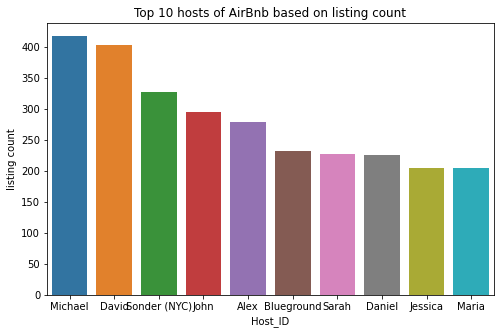

In [72]:
sns.barplot(x= df.host_name.value_counts()[:10].index, y= df.host_name.value_counts()[:10].values)
plt.title('Top 10 hosts of AirBnb based on listing count')
plt.xlabel('Host_ID')
plt.ylabel('listing count')
plt.rcParams['figure.figsize'] = 8,5
plt.show()

here in the figure we have plotted top 10 hosts in the entire dataframe

In [63]:
#the 10 three hosts based on their turnover 
df.groupby('host_name').agg('price').sum().sort_values(ascending=False).head(10)


host_name
Sonder (NYC)    82795
Blueground      70331
Michael         66895
David           65844
Alex            52563
Jessica         50697
John            41892
Sally           39789
Kara            36723
Kevin           35552
Name: price, dtype: int64

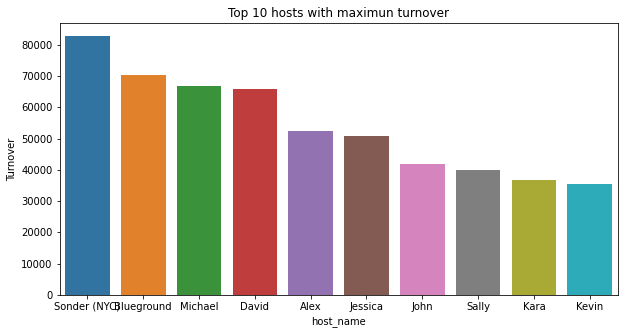

In [66]:
sns.barplot(x=df.groupby('host_name').agg('price').sum().sort_values(ascending=False).head(10).index,y=df.groupby('host_name').agg('price').sum().sort_values(ascending=False).head(10).values)
plt.title('Top 10 hosts with maximun turnover')
plt.ylabel('Turnover')
plt.show()

# What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [20]:
len(df[df['price'] == 0])        #there are few listings with zero price

11

Here we can see that 11 rows has 0 price, which is absoured so we drop these rows

In [22]:
# we drop the columns with price 0
df.drop(df[df['price'] == 0].index, axis=0, inplace= True)

In [23]:
len(df[df['price'] == 0])   # Now we have no rows with zero prices

0

In [24]:
# descriptive statistics on the price column
df.price.describe()

count    48884.000000
mean       152.755053
std        240.170260
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

## Prices in different neighbourhood

In [ ]:
# First we find out how expencive neighbourhood group are
df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)

neighbourhood_group
Manhattan        196.884903
Brooklyn         124.438915
Staten Island    114.812332
Queens            99.517649
Bronx             87.577064
Name: price, dtype: float64

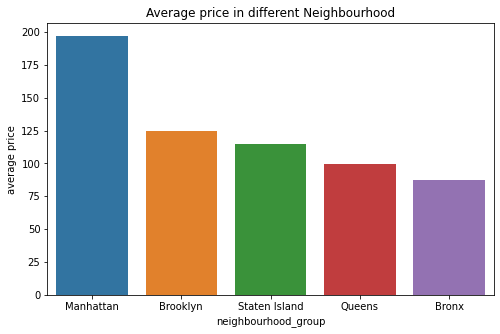

In [44]:
# We plot the above data
price_in_group = df.groupby(['neighbourhood_group'])['price'].mean().sort_values(ascending=False)
sns.barplot(x=price_in_group.index, y= price_in_group.values)
plt.title("Average price in different Neighbourhood")
plt.ylabel('average price')
plt.rcParams['figure.figsize'] = 8,5
plt.show()

From the figure we can see that Manhattan is the most expencive place and followed by Brooklyn

In [28]:
df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood_group  neighbourhood    
Staten Island        Fort Wadsworth       800.000000
                     Woodrow              700.000000
Manhattan            Tribeca              490.638418
Brooklyn             Sea Gate             487.857143
Bronx                Riverdale            442.090909
Staten Island        Prince's Bay         409.500000
Manhattan            Battery Park City    367.557143
                     Flatiron District    341.925000
Staten Island        Randall Manor        336.000000
Manhattan            NoHo                 295.717949
Name: price, dtype: float64

Text(0.5, 1.0, '10 most expencive areas')

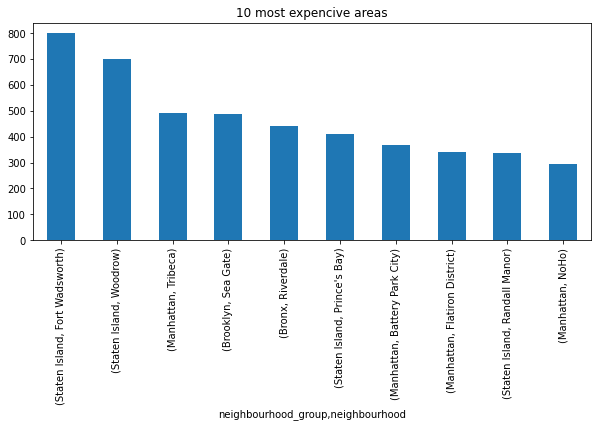

In [ ]:
df.groupby(['neighbourhood_group','neighbourhood'])['price'].mean().sort_values(ascending=False)[:10].plot(kind= 'bar')
plt.title('10 most expencive areas')

## Price and reviews

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48884 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48884 non-null  int64  
 1   name                            48884 non-null  object 
 2   host_id                         48884 non-null  int64  
 3   host_name                       48884 non-null  object 
 4   neighbourhood_group             48884 non-null  object 
 5   neighbourhood                   48884 non-null  object 
 6   latitude                        48884 non-null  float64
 7   longitude                       48884 non-null  float64
 8   room_type                       48884 non-null  object 
 9   price                           48884 non-null  int64  
 10  minimum_nights                  48884 non-null  int64  
 11  number_of_reviews               48884 non-null  int64  
 12  reviews_per_month               

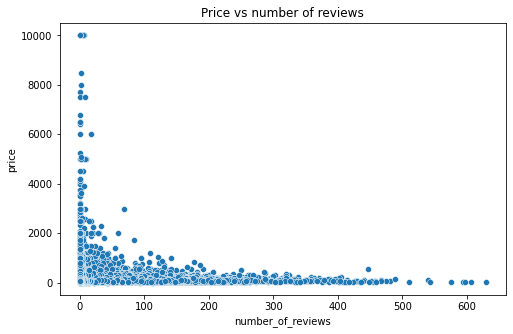

In [46]:
sns.scatterplot(x= df.number_of_reviews, y = df.price )  # We can see where price is low number of coment is more
plt.title("Price vs number of reviews")
plt.show()

From the above data we can see that low cost rooms have msot number of reviews

## Neighbourhood and number of reviews

In [30]:
# We now check which hosts have maximunm number of reviews
df.groupby(['neighbourhood_group', 'neighbourhood'])['number_of_reviews'].sum().sort_values(ascending= False)[:10]

neighbourhood_group  neighbourhood     
Brooklyn             Bedford-Stuyvesant    110068
                     Williamsburg           85424
Manhattan            Harlem                 75962
Brooklyn             Bushwick               52491
Manhattan            Hell's Kitchen         50227
                     East Village           44670
                     East Harlem            36446
Brooklyn             Crown Heights          36408
Manhattan            Upper West Side        36058
                     Upper East Side        31686
Name: number_of_reviews, dtype: int64

Text(0.5, 1.0, 'Top 10 areas with maximum reviews')

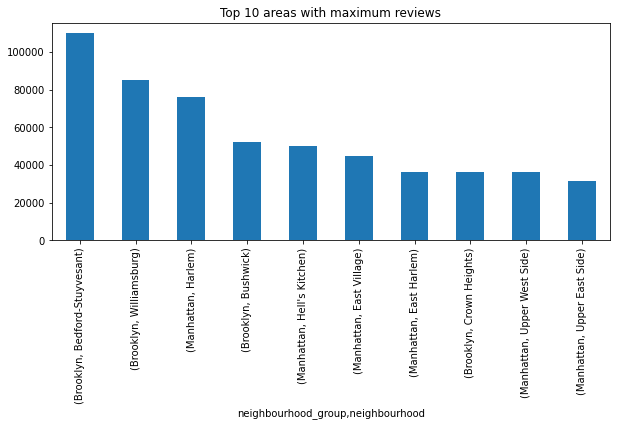

In [31]:
df.groupby(['neighbourhood_group', 'neighbourhood'])['number_of_reviews'].sum().sort_values(ascending= False)[:10].plot(kind='bar')
plt.title('Top 10 areas with maximum reviews')

## Room type and price

In [32]:
df.groupby(['room_type'])['price'].mean()

room_type
Entire home/apt    211.810918
Private room        89.809131
Shared room         70.248705
Name: price, dtype: float64

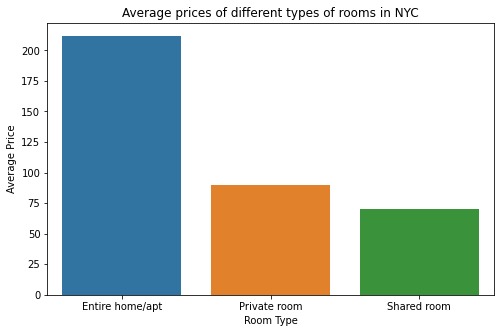

In [47]:
sns.barplot(x= df.groupby(['room_type'])['price'].mean().index, y = df.groupby(['room_type'])['price'].mean().values)
plt.title('Average prices of different types of rooms in NYC')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.rcParams['figure.figsize'] = 5,5
plt.show()

we can see that Entire home/apt are mst expensive followed by private room and then Shared room

# Which hosts are the busiest and why?

In [54]:
# We check top 10 hosts against nuumber of listings and make a dataframe with them
df.host_name.value_counts()[:10]

Michael         417
David           403
Sonder (NYC)    327
John            294
Alex            279
Blueground      232
Sarah           227
Daniel          226
Jessica         205
Maria           204
Name: host_name, dtype: int64

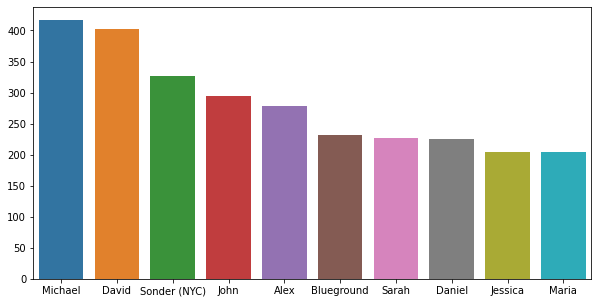

In [56]:
sns.barplot( x= df.host_name.value_counts()[:10].index, y= df.host_name.value_counts()[:10].values )
plt.title("top 10 host name with maximum listings")

above hosts are the busiest since they have maximum number of listings

## Some analysis on differnt type of rooms


the total count of each room type

In [50]:
df['room_type'].value_counts()

Entire home/apt    25407
Private room       22319
Shared room         1158
Name: room_type, dtype: int64

Text(0, 0.5, 'Room count')

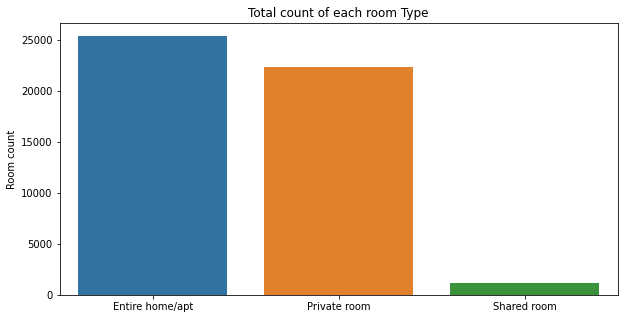

In [53]:
sns.barplot(x = df['room_type'].value_counts().index, y = df['room_type'].value_counts().values )
plt.title("Total count of each room Type")
plt.ylabel('Room count')

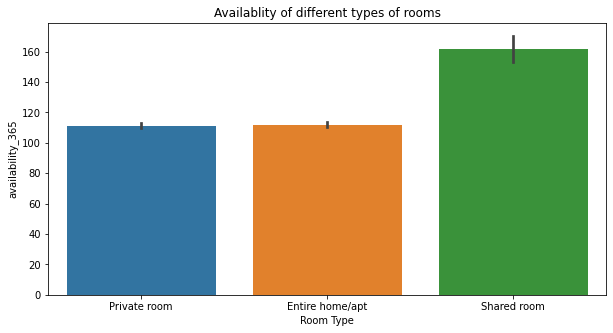

In [59]:
# Room types and their relation with availability in different neighborhood groups?
room_type_availibility=df[['room_type','availability_365']]
sns.barplot(x='room_type',y='availability_365',data=room_type_availibility)
plt.title("Availablity of different types of rooms")
plt.xlabel('Room Type')
plt.show()

# Correlation

In [ ]:
# we make a subset of the dataframe with fewer columns to chech the correlations
df1 = df[['host_id', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]

In [ ]:
#Correlation
df1.corr(method= 'pearson')

,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
host_id,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.209752,0.154949,0.203434
latitude,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.018719,0.019518,-0.010942
longitude,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.138435,-0.114715,0.082669
price,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.050531,0.057462,0.081847
minimum_nights,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.124870,0.127962,0.144275
number_of_reviews,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.589311,-0.072385,0.171975
reviews_per_month,0.209752,-0.018719,0.138435,-0.050531,-0.124870,0.589311,1.000000,-0.047322,0.163664
calculated_host_listings_count,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.047322,1.000000,0.225712
availability_365,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.163664,0.225712,1.000000


correlation heatmap


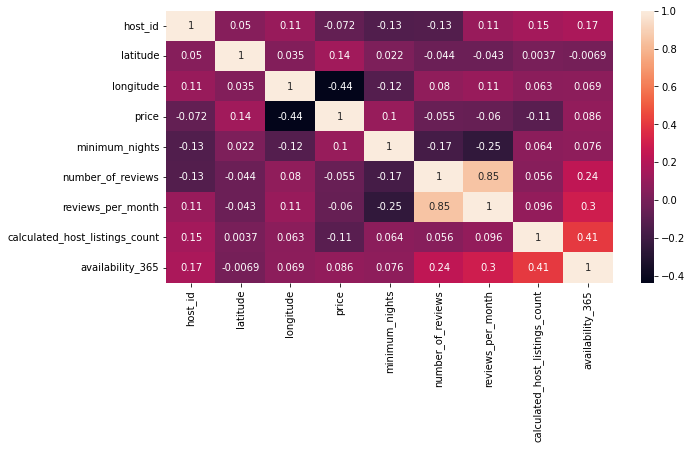

<Figure size 1296x1296 with 0 Axes>

In [ ]:
#Correlaton heatmap
sns.heatmap(df1.corr(method= 'spearman'), annot= True)
plt.figure(figsize=(18,18))
print("correlation heatmap")
plt.show()